There are two tupes of recomendation systems-:

Conetent based recommendation system
collaborative filtering system-:
    Model based
    Memory based

In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
#Importing the datasets

In [4]:
column_name = ['user_id','item_id','rating','timestamp']

df = pd.read_csv('E:/Jupyter/Coding_Blocks/Datasets/ml-100k/ml-100k/u.data',sep='\t',names = column_name)

In [25]:
movie_titles = pd.read_csv('E:/Jupyter/Coding_Blocks/Datasets/ml-100k/ml-100k/u.item', sep='\|', header = None, encoding='latin1')

In [26]:
movie_titles = movie_titles[[0,1]]

In [27]:
movie_titles.columns = ['item_id','title']

In [28]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [20]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [13]:
df.shape

(100000, 4)

In [ ]:
# Chceking no of unique users who have given the review
# also here item id is the movie id and the ratinng is the rating

In [15]:
df['user_id'].nunique()

943

In [16]:
df['item_id'].nunique()

1682

In [30]:
# Mergin or joining the two dataframes

merged_df = pd.merge(df, movie_titles, on ='item_id')

In [ ]:
# Exploratory Data Analysis

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [33]:
merged_df.groupby('title').mean()['rating'].sort_values(ascending = False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [34]:
merged_df.groupby('title').count()['rating'].sort_values(ascending = False).head()

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [35]:
ratings = pd.DataFrame(merged_df.groupby('title').mean()['rating'])

In [36]:
ratings['no_of_ratings'] = pd.DataFrame(merged_df.groupby('title').count()['rating'])

In [37]:
ratings

,rating,no_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [39]:
ratings.sort_values('rating', ascending = False)

,rating,no_of_ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


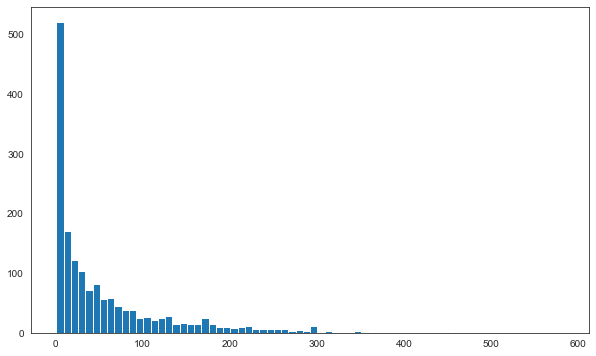

In [41]:
plt.figure(figsize=(10,6))
plt.hist(ratings['no_of_ratings'], bins = 70)
plt.show()

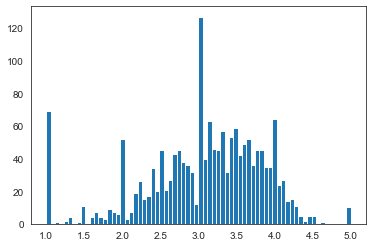

In [42]:
plt.hist(ratings['rating'], bins = 70)
plt.show()

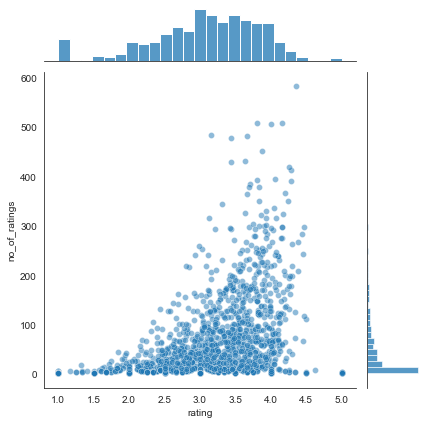

In [44]:
sns.jointplot(x='rating' , y='no_of_ratings' , data = ratings, alpha = 0.5)

In [45]:
moviemat = merged_df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')

In [46]:
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
starwars_user_ratings = moviemat['Star Wars (1977)']

In [48]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

In [49]:
#removing NaN values and cleaning
corr_starwars = pd.DataFrame(similar_to_starwars, columns = ['Correlation'])

In [50]:
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [51]:
corr_starwars.dropna(inplace = True)

In [52]:
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [54]:
temp = pd.merge(corr_starwars,ratings, on = 'title', how = 'left')
temp = temp[temp['no_of_ratings'] > 100]
temp.sort_values('Correlation', ascending = False)

,Correlation,rating,no_of_ratings
title,,,
Star Wars (1977),1.000000,4.358491,583
"Empire Strikes Back, The (1980)",0.747981,4.204360,367
Return of the Jedi (1983),0.672556,4.007890,507
Raiders of the Lost Ark (1981),0.536117,4.252381,420
Austin Powers: International Man of Mystery (1997),0.377433,3.246154,130
...,...,...,...
"Edge, The (1997)",-0.127167,3.539823,113
As Good As It Gets (1997),-0.130466,4.196429,112
Crash (1996),-0.148507,2.546875,128


In [55]:
def predict_movies(movie_name):
    movie_user_ratings = moviemat[movie_name]
    similar_to_movie = moviemat.corrwith(movie_user_ratings)
    corr_movie = pd.DataFrame(similar_to_movie, columns = ['Correlation'])
    corr_movie.dropna(inplace = True)
    temp = pd.merge(corr_movie,ratings, on = 'title', how = 'left')
    temp = temp[temp['no_of_ratings'] > 100]
    temp2 = temp.sort_values('Correlation', ascending = False)
    return temp2.head(10)

In [58]:
predict_movies('As Good As It Gets (1997)')

,Correlation,rating,no_of_ratings
title,,,
As Good As It Gets (1997),1.000000,4.196429,112
Apt Pupil (1998),0.701931,4.100000,160
"Mask, The (1994)",0.618215,3.193798,129
Batman Forever (1995),0.587782,2.666667,114
Glory (1989),0.533915,4.076023,171
Ransom (1996),0.528958,3.644195,267
Cold Comfort Farm (1995),0.522243,3.824000,125
Under Siege (1992),0.504759,3.290323,124
Men in Black (1997),0.485945,3.745875,303
